# Working with personal data requests


In [2]:
import pandas as pd
import numpy as np

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



Part 1 - I couldn't figure out how to convert Instagrams UNIX timestamps with code so I used a converter. 

In [4]:
df = pd.read_csv("saved_posts.csv")
df.columns.values

array(['saved_saved_media/title',
       'saved_saved_media/string_map_data/Saved on/href',
       'saved_saved_media/string_map_data/Saved on/timestamp'],
      dtype=object)

In [11]:
df

,saved_saved_media/title,saved_saved_media/string_map_data/Saved on/href,saved_saved_media/string_map_data/Saved on/timestamp
0,lineskis,https://www.instagram.com/p/BoKEWPVBfNf/,1970-01-01 00:00:01.537896496
1,thepowguide,https://www.instagram.com/p/BoBXrbkjEM6/,1537653828
2,mememonk_,https://www.instagram.com/p/Bn7XTGKgAa3/,1537403356
3,newschoolers,https://www.instagram.com/p/BnbiQ5flNIu/,1536343741
4,mememonk_,https://www.instagram.com/p/BnaEVbdAA7B/,1536294216
...,...,...,...
974,mr_sharp3384,https://www.instagram.com/reel/CmiEAeDo9i-/,1679257770
975,bozodauncle,https://www.instagram.com/reel/CpeB57eJ78M/,1679257758
976,yakubdascientist,https://www.instagram.com/reel/CpIk-TCIRLm/,1679256664
977,baron.jc.sizzle,https://www.instagram.com/reel/Cpf4aiAJsBc/,1679252864


Part 2 - Analyzing Timestamp data for patterns 

In [8]:
df_partner = pd.read_csv("Project-8-timestamps.csv")

In [9]:
df_partner

,Unnamed: 0,date
0,1,2022-12-03 02:46:29 UTC
1,2,2022-12-03 15:56:24 UTC
2,3,2022-12-03 15:56:25 UTC
3,4,2022-12-03 20:12:47 UTC
4,5,2022-12-03 21:23:21 UTC
...,...,...
412,413,2023-03-12 16:32:25 UTC
413,414,2023-03-12 17:39:22 UTC
414,415,2023-03-12 18:59:41 UTC
415,416,2023-03-12 19:59:53 UTC


In [10]:
df_partner["date"] = pd.to_datetime(df_partner["date"])
df_partner.sort_values(by = "date", inplace=True)
df_partner

,Unnamed: 0,date
0,1,2022-12-03 02:46:29+00:00
1,2,2022-12-03 15:56:24+00:00
2,3,2022-12-03 15:56:25+00:00
3,4,2022-12-03 20:12:47+00:00
4,5,2022-12-03 21:23:21+00:00
...,...,...
412,413,2023-03-12 16:32:25+00:00
413,414,2023-03-12 17:39:22+00:00
414,415,2023-03-12 18:59:41+00:00
415,416,2023-03-12 19:59:53+00:00


In [11]:
df_partner["difference"] = df_partner["date"].diff()
df_partner

,Unnamed: 0,date,difference
0,1,2022-12-03 02:46:29+00:00,NaT
1,2,2022-12-03 15:56:24+00:00,0 days 13:09:55
2,3,2022-12-03 15:56:25+00:00,0 days 00:00:01
3,4,2022-12-03 20:12:47+00:00,0 days 04:16:22
4,5,2022-12-03 21:23:21+00:00,0 days 01:10:34
...,...,...,...
412,413,2023-03-12 16:32:25+00:00,0 days 19:27:12
413,414,2023-03-12 17:39:22+00:00,0 days 01:06:57
414,415,2023-03-12 18:59:41+00:00,0 days 01:20:19
415,416,2023-03-12 19:59:53+00:00,0 days 01:00:12


In [12]:
longest = df_partner["difference"].max()
longest

Timedelta('1 days 23:11:49')

In [13]:
average = df_partner["difference"].mean()
average

Timedelta('0 days 05:45:16.807692307')

In [14]:
df_partner["Day"] = df_partner["date"].dt.date
df_partner

,Unnamed: 0,date,difference,Day
0,1,2022-12-03 02:46:29+00:00,NaT,2022-12-03
1,2,2022-12-03 15:56:24+00:00,0 days 13:09:55,2022-12-03
2,3,2022-12-03 15:56:25+00:00,0 days 00:00:01,2022-12-03
3,4,2022-12-03 20:12:47+00:00,0 days 04:16:22,2022-12-03
4,5,2022-12-03 21:23:21+00:00,0 days 01:10:34,2022-12-03
...,...,...,...,...
412,413,2023-03-12 16:32:25+00:00,0 days 19:27:12,2023-03-12
413,414,2023-03-12 17:39:22+00:00,0 days 01:06:57,2023-03-12
414,415,2023-03-12 18:59:41+00:00,0 days 01:20:19,2023-03-12
415,416,2023-03-12 19:59:53+00:00,0 days 01:00:12,2023-03-12


In [15]:
df_partner["Day"].value_counts()

2023-01-14    10
2023-02-28    10
2022-12-12    10
2022-12-10     8
2023-02-16     8
              ..
2023-01-01     1
2022-12-19     1
2022-12-28     1
2023-03-11     1
2022-12-24     1
Name: Day, Length: 94, dtype: int64

It looks like Graeson had three days where something was logged 10 times in that day.

In [16]:
df_partner["Month"] = df_partner["date"].dt.month

In [17]:
df_partner["Month"].value_counts()

2     144
12    134
1      98
3      41
Name: Month, dtype: int64

February had the most events logged at 144. 

What do you think the source of this data is? Write a few sentences explaining your reasoning. What other data might help you verify if you are correct?

I think the source of this data is not spotify or youtube because spotify needs more events per day, and youtube would need less perday. I am thinking something like instagram, any other social media platform, or a forum platform like reddit. There are a lot of days with only 1 entry so I am actually leaning toward something like reddit where interaction might be less, whereas instagram is more addictive and would probably have slightly more events per day. 

The months with by far the most interaction were december, january and february. I found multiple correlations to social media use and reddit use during the winter. So I think that I am on the right track with my answer. 

Part 3 - Group visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
ts3 = pd.read_csv("Project-8-timestamps.csv")
ts3

In [ ]:
dateTimes3 = pd.DataFrame()
# The timestamps were in GMT
# converting to Pacific time
pacific = pytz.timezone("US/Pacific")
dateTimes3["date"] = pd.to_datetime(ts3["date"]).dt.tz_convert(pacific)
# columns for Aby
dateTimes["month"] = pd.to_datetime(dateTimes["endTime"].dt.strftime("%Y-%m-01"))
dateTimes["day"] = pd.to_datetime(dateTimes["endTime"].dt.strftime("%Y-%m-%d"))
dateTimes["hours"] = (dateTimes["endTime"] - dateTimes["endTime"].dt.floor("D")).dt.seconds / 60 / 60
# columns for Miles
dateTimes2["month"] = pd.to_datetime(dateTimes2["time"].dt.strftime("%Y-%m-01"))
dateTimes2["day"] = pd.to_datetime(dateTimes2["time"].dt.strftime("%Y-%m-%d"))
dateTimes2["hours"] = (dateTimes2["time"] - dateTimes2["time"].dt.floor("D")).dt.seconds / 60 / 60
# colums for Graeson
dateTimes3["month"] = pd.to_datetime(dateTimes3["date"].dt.strftime("%Y-%m-01"))
dateTimes3["day"] = pd.to_datetime(dateTimes3["date"].dt.strftime("%Y-%m-%d"))
dateTimes3["hours"] = (dateTimes3["date"] - dateTimes3["date"].dt.floor("D")).dt.seconds / 60 / 60
# creating a new column that tells what person the data is from
dateTimes["person"] = "Aby"
dateTimes2["person"] = "Miles"
dateTimes3["person"] = "Graeson"
# Miles data goes back years so this limits it to just around late 2022 to 2023
dateTimes4 = dateTimes2[325:-1]
dateTimes4

In [ ]:
# combining all the dfs into one df and standardizing the name of the column that contains the timestamps
combined = dateTimes.rename(columns={"endTime":"date"})
combined = pd.concat([combined,dateTimes4.rename(columns={"time":"date"}), dateTimes3], ignore_index=True)
combined

In [ ]:
# This shows timestamps by day starting in late 2022 going through to whoever had the most recent data
# The y-axis is hours after midnight. example would be hour 5 is 5:00am and hour 17 is 5:00pm
sns.scatterplot(data = combined, x = "day", y = "hours", hue = "person")

Part 4 - Additional Analysis

How pronounced is the change in use over hte course of the year? - Visualization

In [19]:
df_partner

,Unnamed: 0,date,difference,Day,Month
0,1,2022-12-03 02:46:29+00:00,NaT,2022-12-03,12
1,2,2022-12-03 15:56:24+00:00,0 days 13:09:55,2022-12-03,12
2,3,2022-12-03 15:56:25+00:00,0 days 00:00:01,2022-12-03,12
3,4,2022-12-03 20:12:47+00:00,0 days 04:16:22,2022-12-03,12
4,5,2022-12-03 21:23:21+00:00,0 days 01:10:34,2022-12-03,12
...,...,...,...,...,...
412,413,2023-03-12 16:32:25+00:00,0 days 19:27:12,2023-03-12,3
413,414,2023-03-12 17:39:22+00:00,0 days 01:06:57,2023-03-12,3
414,415,2023-03-12 18:59:41+00:00,0 days 01:20:19,2023-03-12,3
415,416,2023-03-12 19:59:53+00:00,0 days 01:00:12,2023-03-12,3


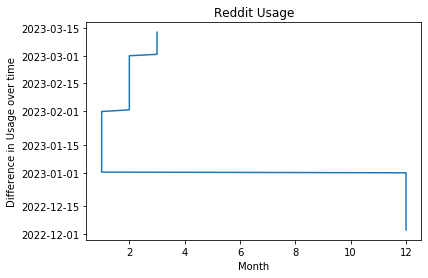

In [33]:
import matplotlib.pyplot as plt

x_axis = df_partner["Month"]
y_axis = df_partner["date"]

plt.plot(x_axis, y_axis)
plt.title('Reddit Usage')
plt.xlabel('Month')
plt.ylabel('Difference in Usage over time')
plt.show()

We can see that the usage was far greater during the time between December and january. 

What is the minimum time between usage throughout the record?

In [40]:
df_partner["Hour"] = df_partner["date"].dt.strftime("%H")
df_partner

,Unnamed: 0,date,difference,Day,Month,Hour
0,1,2022-12-03 02:46:29+00:00,NaT,2022-12-03,12,02
1,2,2022-12-03 15:56:24+00:00,0 days 13:09:55,2022-12-03,12,15
2,3,2022-12-03 15:56:25+00:00,0 days 00:00:01,2022-12-03,12,15
3,4,2022-12-03 20:12:47+00:00,0 days 04:16:22,2022-12-03,12,20
4,5,2022-12-03 21:23:21+00:00,0 days 01:10:34,2022-12-03,12,21
...,...,...,...,...,...,...
412,413,2023-03-12 16:32:25+00:00,0 days 19:27:12,2023-03-12,3,16
413,414,2023-03-12 17:39:22+00:00,0 days 01:06:57,2023-03-12,3,17
414,415,2023-03-12 18:59:41+00:00,0 days 01:20:19,2023-03-12,3,18
415,416,2023-03-12 19:59:53+00:00,0 days 01:00:12,2023-03-12,3,19


In [41]:
df_partner["Hour"].value_counts()

01    44
20    42
17    42
16    42
18    33
02    31
22    30
19    27
21    24
00    20
03    19
23    17
15    17
04    13
05     8
06     4
14     3
07     1
Name: Hour, dtype: int64

A change was logged 44 times in one hour. This could mean that it is a very active posting website where conversations can go back and forth. This makes me suspect reddit even more as being hte correct choice for Graesons data. 